## Visualization of image discretization 

In [1]:
import sys
sys.path.append('../src')

import matplotlib.pyplot as plt
import numpy as np
from omegaconf import OmegaConf

from imutils import imread, imshow, load_npy, imsshow, rgb2gray
from data.convertation import srgbf_to_linrgbf, float_to_uint16, linrrgb16_to_srgb8
from data.convolution import convolve
from deconv.classic.wiener.wiener import wiener_gray

plt.gray()

<Figure size 640x480 with 0 Axes>

In [2]:
psf = load_npy('../datasets/kernels/motion-blur/processed/Sun/sun-3.npy', key='psf')

config = OmegaConf.load('../configs/config_viz.yml')
cm = config.models

wiener_noised = lambda image, psf: wiener_gray(image, psf, **cm.wiener_nonblind_noise.noise_params)
wiener = lambda image, psf: wiener_gray(image, psf, **cm.wiener_nonblind_noise.no_noise_params)

max_uin16 = 2 ** 16 -1
max_uint8 = 2 ** 8 - 1

In [3]:
cm.wiener_nonblind_noise

{'gauss_blur': True, 'motion_blur': True, 'eye_blur': True, 'RGB': True, 'no_noise_params': {'balance': 1e-08, 'clip': True}, 'noise_params': {'balance': 0.005, 'clip': True}}

## PNG

### float sRGB

Converted to gray


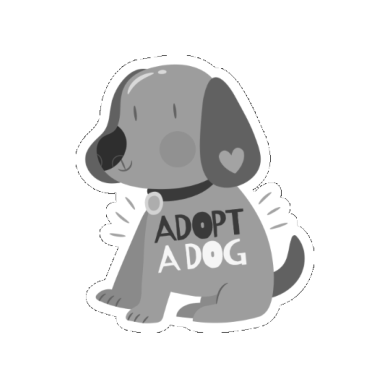

float64 0.027450980618596077 0.9999999999999999


In [4]:
img_path = "../datasets/gt/precomp/icons_jpg/1/adopt.png"
# img_path = '../datasets/gt/Sun-gray/im_1.png'
image = imread(img_path)
if image.ndim == 3:
    image = rgb2gray(image)
    print('Converted to gray')

imshow(image)
print(image.dtype, image.min(), image.max())

### float linRGB

In [5]:
image = srgbf_to_linrgbf(image)
blurred_image = convolve(image, psf)

float64


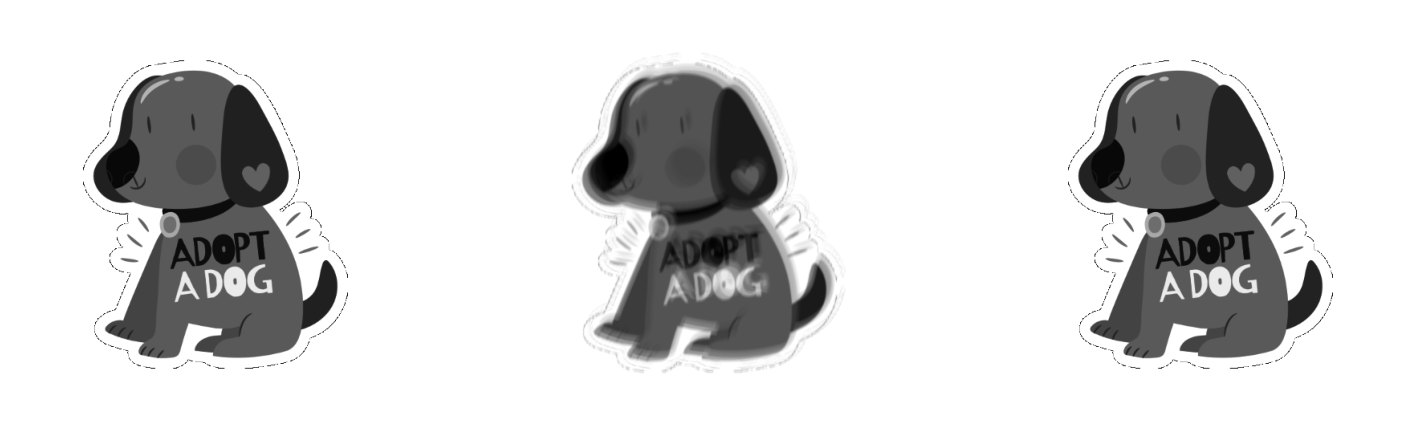

In [6]:
restored = wiener(blurred_image, psf)

imsshow([image, blurred_image, restored], figsize=(18, 7))
print(image.dtype)

### linRGB 16 bit

In [7]:
image = float_to_uint16(image)
blurred_image = float_to_uint16(blurred_image)

uint16


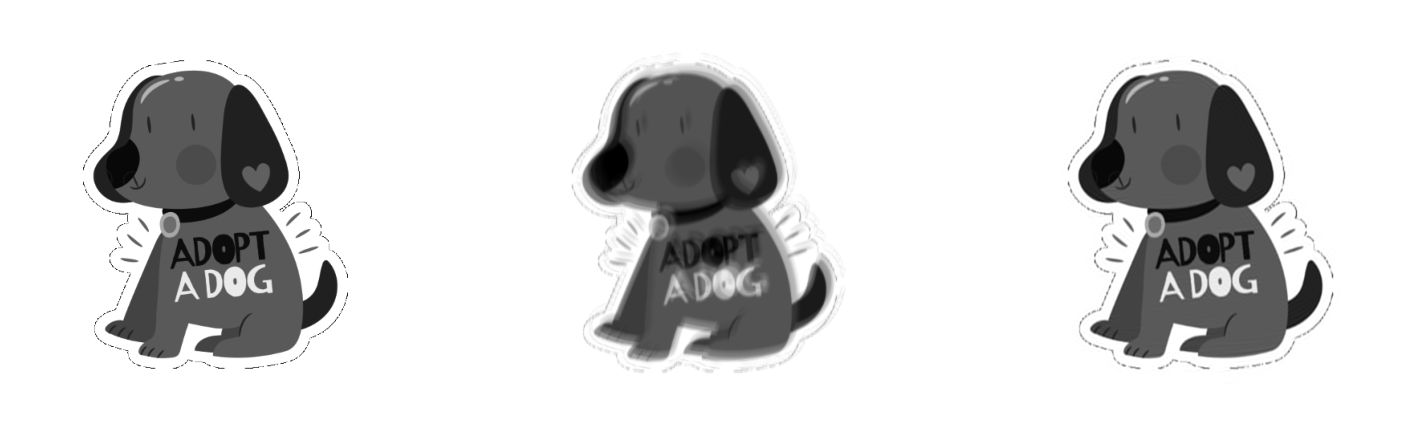

In [8]:
restored = wiener_noised(blurred_image / max_uin16, psf)

imsshow([image, blurred_image, restored], figsize=(18, 7))
print(image.dtype)

### sRGB 8 bit

In [9]:
image = linrrgb16_to_srgb8(image)
blurred_image = linrrgb16_to_srgb8(blurred_image)

uint8


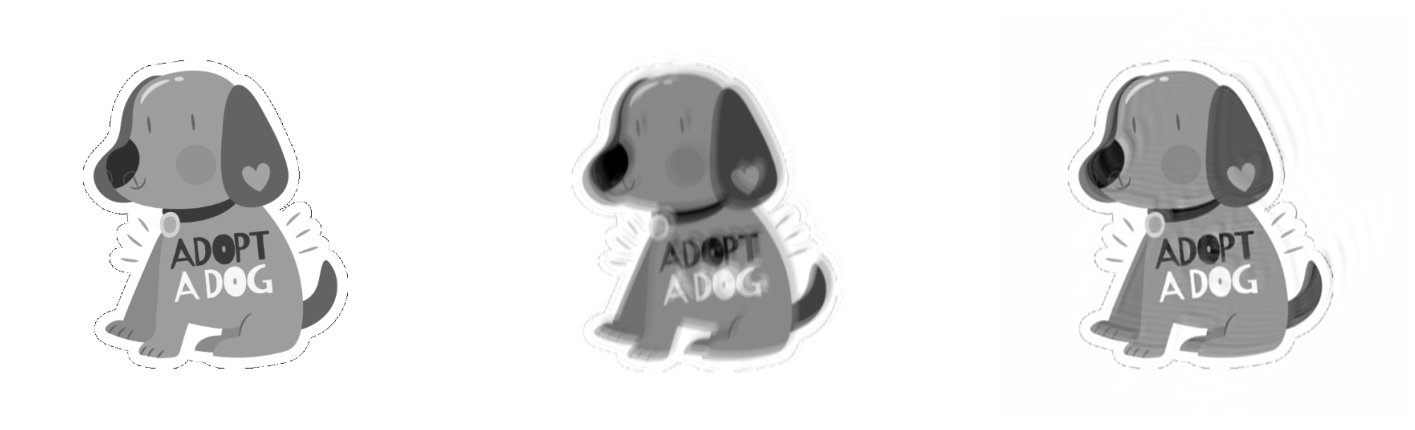

In [10]:
restored = wiener_noised(blurred_image / max_uint8, psf)

imsshow([image, blurred_image, restored], figsize=(18, 7))
print(image.dtype)